In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
import scipy.integrate as integrate
from matplotlib.patches import Circle
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import Normalize
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.patches import FancyArrowPatch
import os
from mpl_toolkits.mplot3d import proj3d
from matplotlib.colors import Normalize
import matplotlib.ticker as ticker

import matplotlib.patches as patches

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

import matplotlib.cm as cm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [3]:
def interpol_values(df,k):
    interpolated_values= np.interp(np.linspace(-0.015,0.015,NPOSES), df.iloc[k], df.iloc[k+1] )
    #plt.plot(interpolated_values)
    return(interpolated_values)

NTIMES=101
NPOSES=202

def resample_2D_veloc(file): #"Simus_vitesses_2D/full_R07_v40.csv"
    df=pd.read_csv(file, sep=',', encoding='utf-8',header = 0)
    df.drop([k*3 for k in range(NTIMES)], axis=0, inplace=True)
    df.reset_index(inplace = True, drop=True)

    new_df= np.zeros((NTIMES,NPOSES)) #time, x_vals
    for k in range(2*NTIMES):
        if k%2==0:
            new_df[int(k/2),:]=interpol_values(df,k)
    return(new_df)

df_R07v05=resample_2D_veloc("Flow_Velocities_2D/full_R07_v05.csv")
df_R07v10=resample_2D_veloc("Flow_Velocities_2D/full_R07_v10.csv")
df_R07v20=resample_2D_veloc("Flow_Velocities_2D/full_R07_v20.csv")
df_R07v40=resample_2D_veloc("Flow_Velocities_2D/full_R07_v40.csv")

df_R15v05=resample_2D_veloc("Flow_Velocities_2D/full_R15_v05.csv")
df_R15v10=resample_2D_veloc("Flow_Velocities_2D/full_R15_v10.csv")
df_R15v20=resample_2D_veloc("Flow_Velocities_2D/full_R15_v20.csv")
df_R15v40=resample_2D_veloc("Flow_Velocities_2D/full_R15_v40.csv")

df_R25v05=resample_2D_veloc("Flow_Velocities_2D/full_R25_v05.csv")
df_R25v10=resample_2D_veloc("Flow_Velocities_2D/full_R25_v10.csv")
df_R25v20=resample_2D_veloc("Flow_Velocities_2D/full_R25_v20.csv")
df_R25v40=resample_2D_veloc("Flow_Velocities_2D/full_R25_v40.csv")

Vitesses_dico ={}
Vitesses_dico["R7.5_v5"]  =df_R07v05
Vitesses_dico["R7.5_v10"] =df_R07v10
Vitesses_dico["R7.5_v20"] =df_R07v20
Vitesses_dico["R7.5_v40"] =df_R07v40
Vitesses_dico["R15_v5"] =df_R15v05
Vitesses_dico["R15_v10"]=df_R15v10
Vitesses_dico["R15_v20"]=df_R15v20
Vitesses_dico["R15_v40"]=df_R15v40
Vitesses_dico["R25_v5"] =df_R25v05
Vitesses_dico["R25_v10"]=df_R25v10
Vitesses_dico["R25_v20"]=df_R25v20
Vitesses_dico["R25_v40"]=df_R25v40


In [ ]:
def interpol_values(df,k):
    interpolated_values= np.interp(np.linspace(-0.015,0.015,NPOSES), df.iloc[k], df.iloc[k+1] )
    #plt.plot(interpolated_values)
    return(interpolated_values)

NTIMES=101
NPOSES=202

def high_R_approx(v,D,time, norm=True):
    v=v*1e-2 #en CM !!!
    R=D/2 * 1e-3 #en MM!!!!!
    if norm:
        HR= [v * R**3 / (((4*1e-2+ R) - v*t)**3) * 1/v for t in time]
    else:
        HR= [v * R**3 / (((4*1e-2+ R) - v*t)**3) for t in time]
    return(HR)



def low_R_approx(v,D,time, norm=True):
    v=v*1e-2 #en CM !!!
    R=D/2 * 1e-3 #en MM!!!!!
    if norm:
        LR= [v * (1.5 * R/((4*1e-2+ R)-v*t) - 0.5* (R/((4*1e-2+ R)-v*t))**3) * 1/v for t in time]
    else:
        LR= [v * (1.5 * R/((4*1e-2+ R)-v*t) - 0.5* (R/((4*1e-2+ R)-v*t))**3) for t in time]
    return(LR)


def resample_2D_veloc(file): #"Simus_vitesses_2D/full_R07_v40.csv"
    df=pd.read_csv(file, sep=',', encoding='utf-8',header = 0)
    df.drop([k*3 for k in range(NTIMES)], axis=0, inplace=True)
    df.reset_index(inplace = True, drop=True)

    new_df= np.zeros((NTIMES,NPOSES)) #time, x_vals
    for k in range(2*NTIMES):
        if k%2==0:
            new_df[int(k/2),:]=interpol_values(df,k)
    return(new_df)

df_R07v05=resample_2D_veloc("Flow_Velocities_2D/full_R07_v05.csv")
df_R07v10=resample_2D_veloc("Flow_Velocities_2D/full_R07_v10.csv")
df_R07v20=resample_2D_veloc("Flow_Velocities_2D/full_R07_v20.csv")
df_R07v40=resample_2D_veloc("Flow_Velocities_2D/full_R07_v40.csv")

df_R15v05=resample_2D_veloc("Flow_Velocities_2D/full_R15_v05.csv")
df_R15v10=resample_2D_veloc("Flow_Velocities_2D/full_R15_v10.csv")
df_R15v20=resample_2D_veloc("Flow_Velocities_2D/full_R15_v20.csv")
df_R15v40=resample_2D_veloc("Flow_Velocities_2D/full_R15_v40.csv")

df_R25v05=resample_2D_veloc("Flow_Velocities_2D/full_R25_v05.csv")
df_R25v10=resample_2D_veloc("Flow_Velocities_2D/full_R25_v10.csv")
df_R25v20=resample_2D_veloc("Flow_Velocities_2D/full_R25_v20.csv")
df_R25v40=resample_2D_veloc("Flow_Velocities_2D/full_R25_v40.csv")

Vitesses_dico ={}
Vitesses_dico["R7.5_v5"]  =df_R07v05
Vitesses_dico["R7.5_v10"] =df_R07v10
Vitesses_dico["R7.5_v20"] =df_R07v20
Vitesses_dico["R7.5_v40"] =df_R07v40
Vitesses_dico["R15_v5"] =df_R15v05
Vitesses_dico["R15_v10"]=df_R15v10
Vitesses_dico["R15_v20"]=df_R15v20
Vitesses_dico["R15_v40"]=df_R15v40
Vitesses_dico["R25_v5"] =df_R25v05
Vitesses_dico["R25_v10"]=df_R25v10
Vitesses_dico["R25_v20"]=df_R25v20
Vitesses_dico["R25_v40"]=df_R25v40

masse=1.204*0.01*0.01*0.008
Vitesses_dico["P_R7.5_v5"]  =pd.read_csv("Momentums_3D/2_Volume_R7.5_V5.csv",header=None)*masse
Vitesses_dico["P_R7.5_v10"] =pd.read_csv("Momentums_3D/2_Volume_R7.5_V10.csv",header=None)*masse
Vitesses_dico["P_R7.5_v20"] =pd.read_csv("Momentums_3D/2_Volume_R7.5_V20.csv",header=None)*masse
Vitesses_dico["P_R7.5_v40"] =pd.read_csv("Momentums_3D/2_Volume_R7.5_V40.csv",header=None)*masse
Vitesses_dico["P_R15_v5"] =pd.read_csv("Momentums_3D/2_Volume_R15_V5.csv",header=None)*masse
Vitesses_dico["P_R15_v10"]=pd.read_csv("Momentums_3D/2_Volume_R15_V10.csv",header=None)*masse
Vitesses_dico["P_R15_v20"]=pd.read_csv("Momentums_3D/2_Volume_R15_V20.csv",header=None)*masse
Vitesses_dico["P_R15_v40"]=pd.read_csv("Momentums_3D/2_Volume_R15_V40.csv",header=None)*masse
Vitesses_dico["P_R25_v5"] =pd.read_csv("Momentums_3D/2_Volume_R25_V5.csv",header=None)*masse
Vitesses_dico["P_R25_v10"]=pd.read_csv("Momentums_3D/2_Volume_R25_V10.csv",header=None)*masse
Vitesses_dico["P_R25_v20"]=pd.read_csv("Momentums_3D/2_Volume_R25_v20.csv",header=None)*masse
Vitesses_dico["P_R25_v40"]=pd.read_csv("Momentums_3D/2_Volume_R25_v40.csv",header=None)*masse



def extract_momentum(v,r):
    NPOSES=202
    NTIMES=101
    if r != 7.5:
        r=int(r)
    Pstring= "P_R"+ str(r)+"_v"+str(int(v))
    #Vstring= "V_R"+ str(r)+"_v"+str(int(v))
    
    TP=Vitesses_dico[Pstring]
    #TV=Vitesses_dico[Vstring]
    
    X0=np.linspace(0,6/v,NTIMES) 
    X=X0-4/v
    idx=np.min(np.argwhere(X > 0.005))
    #print(idx)
    return(X[:idx],TP[0].iloc[:idx])


def format_axes(ax,xlabel,ylabel, reffig, loclegend):
    ax.text(reffig[0], reffig[1], reffig[2], fontsize=reffig[3], fontweight="bold", transform=ax.transAxes)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.legend(fontsize=8,loc=loclegend, frameon=False)    

def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


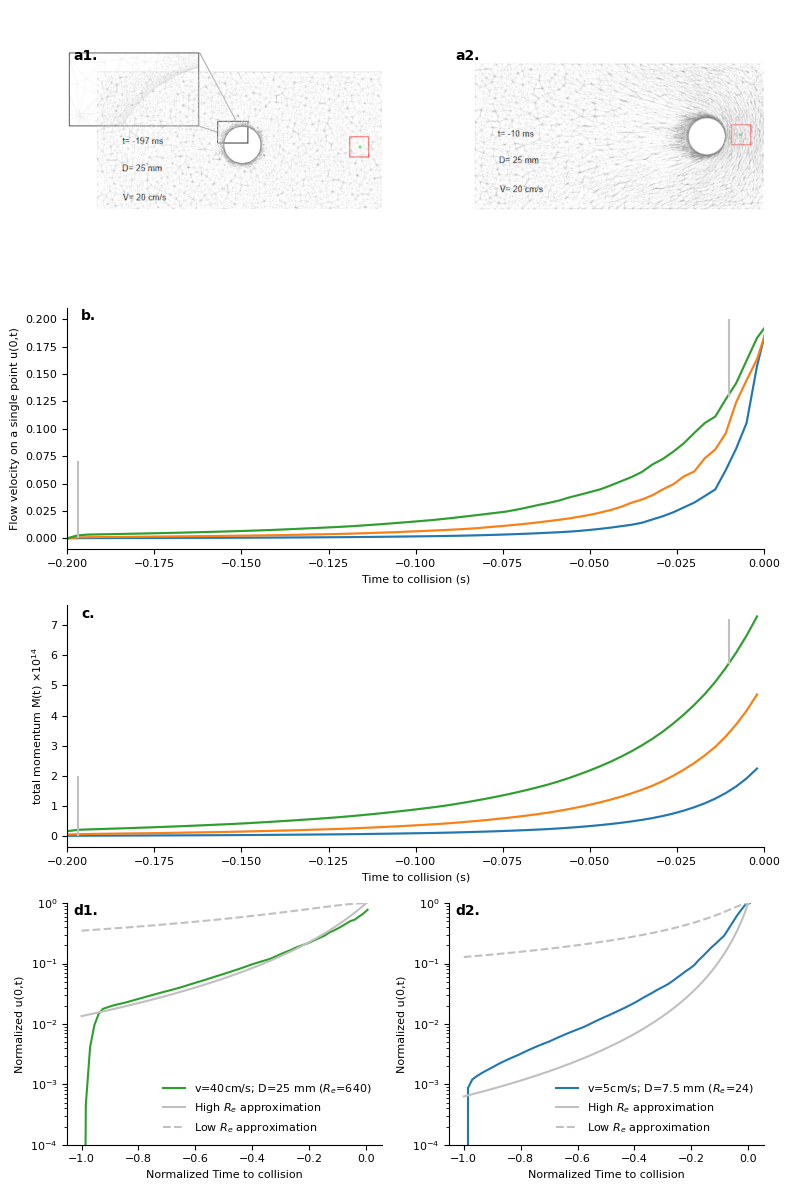

In [224]:
fig,ax = plt.subplots(figsize=(8,12))
ax.axis('off')
ax00=plt.subplot2grid((4,2),(0,0))
ax01=plt.subplot2grid((4,2),(0,1))

ax02=plt.subplot2grid((4,2),(1,0), colspan=2)
ax03=plt.subplot2grid((4,2),(2,0), colspan=2)

ax04=plt.subplot2grid((4,2),(3,0))
ax05=plt.subplot2grid((4,2),(3,1))


with cbook.get_sample_data(os.getcwd()+'\\SupplementaryFlow_snapshot1.png') as image_file:
    image = plt.imread(image_file)
ax00.imshow(image)

with cbook.get_sample_data(os.getcwd()+'\\SupplementaryFlow_snapshot2.png') as image_file:
    image = plt.imread(image_file)
ax01.imshow(image)


ax00.axis('off') 
ax01.axis('off') 

format_axes(ax00,'','', [0.02,0.95,'a1.',10], None)
format_axes(ax01,'','', [0.02,0.95,'a2.',10], None)



### --- Plot Velcoity --- ###
radius=[7.5, 15, 25]
colors=['tab:blue','tab:orange','tab:green']
linestyles=['dashed','solid','dotted',(0, (3, 5, 1, 5))]
V=20
for (r,col) in zip(radius, colors):
    string= "R"+ str(r)+"_v"+str(V)
    T=Vitesses_dico[string] #Rechercher clé dans le dico
    X0=np.linspace(0,6/V,NTIMES) #axs[j].plot(np.linspace(0,6/V,NTIMES),T[:,NPOSES//2],label=str(V))
    X=X0-4/V #mise à zéro
    idx=np.min(np.argwhere(X > 0.005)) #idx=np.min(np.argwhere(X0 > 4/V+0.005))
    ax02.plot(X[:idx],T[:idx,NPOSES//2],linestyle='solid', color='grey',alpha=0.25) #pour fond gris
    ax02.plot(X[:idx],T[:idx,NPOSES//2],linestyle='solid', color=col) #idxr et pas idxv pour color
            


### --- Plot Momentums --- ###
radius=[7.5, 15, 25]
colors=['tab:blue','tab:orange','tab:green']
linestyles=['dashed','solid','dotted',(0, (3, 5, 1, 5))]
for (r,col) in zip(radius, colors):
    t,v=extract_momentum(20,r)
    ax03.plot(t,v*1e14,color='grey',linestyle='solid', alpha=0.25)
    ax03.plot(t,v*1e14,color=col,linestyle='solid')


format_axes(ax02,'Time to collision (s)',r"Flow velocity on a single point u(0,t)", [0.02,0.95,'b.',10], None)
format_axes(ax03,'Time to collision (s)',r"total momentum M(t) $\times 10^{14}$", [0.02,0.95,'c.',10], None)
ax02.set_xlim([-4/20,0])
ax03.set_xlim([-4/20,0])


V, D = 5, 7.5
string= "R"+ str(D)+"_v"+str(V)
W=Vitesses_dico[string] 
X0=np.linspace(0,6/V,NTIMES) 
X=X0-4/V 
idx=np.min(np.argwhere(X > 0.005)) 
TIME, VELO = X[:idx] ,W[:idx,NPOSES//2]
TIMENORM=[t/(4/V) for t in TIME]
VELONORM=[v/(V*1e-2) for v in VELO]
ax05.plot(TIMENORM, VELONORM,linestyle='solid', color='tab:blue', label='v='+str(V)+'cm/s; D='+str(D)+' mm ($R_e$=24)')
ax05.plot(TIMENORM, high_R_approx(V,D,TIME+4/V, norm=True), color='silver', label=r'High $R_e$ approximation')
ax05.plot(TIMENORM, low_R_approx(V,D,TIME+4/V, norm=True), color='silver', linestyle='dashed', label=r'Low $R_e$ approximation')
ax05.set_yscale('log')
ax05.set_ylim([1e-4,1])
ax05.legend(frameon=False, fontsize=8)


V, D = 40, 25
string= "R"+ str(D)+"_v"+str(V)
W=Vitesses_dico[string] 
X0=np.linspace(0,6/V,NTIMES) 
X=X0-4/V 
idx=np.min(np.argwhere(X > 0.001)) 
TIME, VELO = X[:idx]  ,W[:idx,NPOSES//2]
TIMENORM=[t/(4/V) for t in TIME]
VELONORM=[v/(V*1e-2) for v in VELO]
ax04.plot(TIMENORM, VELONORM,linestyle='solid', color='tab:green', label='v='+str(V)+'cm/s; D='+str(D)+r' mm ($R_e$=640)')
ax04.plot(TIMENORM, high_R_approx(V,D,TIME+4/V, norm=True), color='silver', label=r'High $R_e$ approximation')
ax04.plot(TIMENORM, low_R_approx(V,D,TIME+4/V, norm=True), color='silver', linestyle='dashed', label=r'Low $R_e$ approximation')
ax04.set_yscale('log')
ax04.set_ylim([1e-4,1])
ax04.legend(frameon=False, fontsize=8)

format_axes(ax04,'Normalized Time to collision',r"Normalized u(0,t)", [0.02,0.95,'d1.',10], None)
format_axes(ax05,'Normalized Time to collision',r"Normalized u(0,t)", [0.02,0.95,'d2.',10], None)


ax02.vlines(-0.197,0,0.071, color='silver')
ax02.vlines(-0.010,0.129,0.2, color='silver')

ax03.vlines(-0.197,0,2, color='silver')
ax03.vlines(-0.010,5.7,7.2, color='silver')

fig.tight_layout()
plt.savefig("Supplementary_Flows.pdf", format="pdf", bbox_inches="tight") 

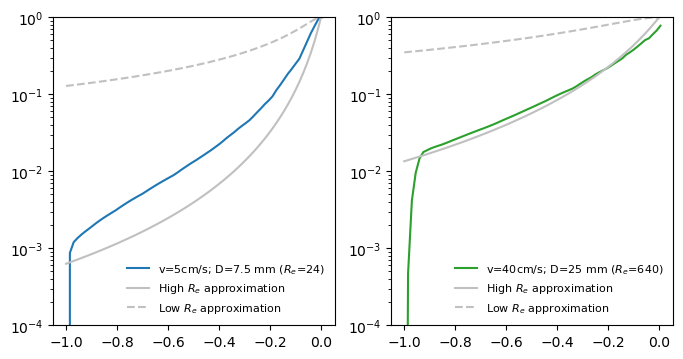

In [180]:
fig,(ax05,ax04) = plt.subplots(1,2, figsize=(8,4))

V, D = 5, 7.5
string= "R"+ str(D)+"_v"+str(V)
W=Vitesses_dico[string] 
X0=np.linspace(0,6/V,NTIMES) 
X=X0-4/V 
idx=np.min(np.argwhere(X > 0.005)) 
TIME, VELO = X[:idx] ,W[:idx,NPOSES//2]
TIMENORM=[t/(4/V) for t in TIME]
VELONORM=[v/(V*1e-2) for v in VELO]
ax05.plot(TIMENORM, VELONORM,linestyle='solid', color='tab:blue', label='v='+str(V)+'cm/s; D='+str(D)+' mm ($R_e$=24)')
ax05.plot(TIMENORM, high_R_approx(V,D,TIME+4/V, norm=True), color='silver', label=r'High $R_e$ approximation')
ax05.plot(TIMENORM, low_R_approx(V,D,TIME+4/V, norm=True), color='silver', linestyle='dashed', label=r'Low $R_e$ approximation')
ax05.set_yscale('log')
ax05.set_ylim([1e-4,1])
ax05.legend(frameon=False, fontsize=8)


V, D = 40, 25
string= "R"+ str(D)+"_v"+str(V)
W=Vitesses_dico[string] 
X0=np.linspace(0,6/V,NTIMES) 
X=X0-4/V 
idx=np.min(np.argwhere(X > 0.001)) 
TIME, VELO = X[:idx]  ,W[:idx,NPOSES//2]
TIMENORM=[t/(4/V) for t in TIME]
VELONORM=[v/(V*1e-2) for v in VELO]
ax04.plot(TIMENORM, VELONORM,linestyle='solid', color='tab:green', label='v='+str(V)+'cm/s; D='+str(D)+r' mm ($R_e$=640)')
ax04.plot(TIMENORM, high_R_approx(V,D,TIME+4/V, norm=True), color='silver', label=r'High $R_e$ approximation')
ax04.plot(TIMENORM, low_R_approx(V,D,TIME+4/V, norm=True), color='silver', linestyle='dashed', label=r'Low $R_e$ approximation')
ax04.set_yscale('log')
ax04.set_ylim([1e-4,1])
ax04.legend(frameon=False, fontsize=8)



